In [1]:
import sys
if '../' not in sys.path: sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2

from itertools import izip

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

from RandomForestMultivariate import RandomForest
from data.dataset import IrisDataSet, WineDataSet, BupaDataSet

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data = IrisDataSet().load()
data = WineDataSet().load()
# data = BupaDataSet().load()

X_train, Y_train, X_test, Y_test = data.split(p_test=0.25)

x.shape: (178, 13)
y.shape: (178,) 

y unique: [1.0, 2.0, 3.0]
Y_train:  [ 1.  2.  3.]
Y_test:   [ 1.  2.  3.]


In [4]:
chosen_class = 2
Y_train = (Y_train == chosen_class).astype(int)
Y_test = (Y_test == chosen_class).astype(int)

In [5]:
loss = {cat: {'train': [], 'test': []} for cat in ['student', 'sklearn']}

In [6]:
trees_range = range(3, 101)

for n_trees in trees_range:
    print 'n_trees = {}'.format(n_trees)
    
    for category_cl, random_forest in {
        'student': RandomForest(n_trees=n_trees, p_items=1.0, p_features=0.8),
        'sklearn': RandomForestClassifier(n_estimators=n_trees, max_features=0.8)
    }.iteritems():
        print 'Fit {}\'s random forest...'.format(category_cl)
        random_forest.fit(X_train, Y_train)
    
        Y_pred = random_forest.predict_proba(X_train)
        score = log_loss(Y_train, Y_pred)
        loss[category_cl]['train'].append(score)
        print 'Prediction for X_train: {:>.4f}'.format(score)

        Y_pred = random_forest.predict_proba(X_test)
        score = log_loss(Y_test, Y_pred)
        loss[category_cl]['test'].append(score)
        print 'Prediction for X_test:  {:>.4f}'.format(score)
        
    print '-' * 40

n_trees = 3
Fit student's random forest...
Fit is complete!
Prediction for X_train: 0.0235
Prediction for X_test:  0.9129
Fit sklearn's random forest...
Prediction for X_train: 0.0544
Prediction for X_test:  1.6199
----------------------------------------
n_trees = 4
Fit student's random forest...
Fit is complete!
Prediction for X_train: 0.0430
Prediction for X_test:  3.1997
Fit sklearn's random forest...
Prediction for X_train: 0.0290
Prediction for X_test:  0.1037
----------------------------------------
n_trees = 5
Fit student's random forest...
Fit is complete!
Prediction for X_train: 0.0425
Prediction for X_test:  0.1343
Fit sklearn's random forest...
Prediction for X_train: 0.0335
Prediction for X_test:  1.6640
----------------------------------------
n_trees = 6
Fit student's random forest...
Fit is complete!
Prediction for X_train: 0.0204
Prediction for X_test:  0.1757
Fit sklearn's random forest...
Prediction for X_train: 0.0389
Prediction for X_test:  0.1871
-----------------

In [7]:
def plot_compare_graphs(trees_range, sklearn_g, student_g, alpha):
    plt.figure(figsize=(7, 5))
    
    sklearn_g = np.asarray(sklearn_g, dtype=float)
    student_g = np.asarray(student_g, dtype=float)
    
    graph = [None for i in range(2)]
    graph[0] = plt.plot(trees_range, sklearn_g, color='r', label='sklearn')
    graph[1] = plt.plot(trees_range, student_g, color='b', label='student')
    
    border_u = sklearn_g + alpha
    border_l = np.amax(np.vstack((sklearn_g - alpha, np.zeros(border_u.shape))), axis=0)
    
    plt.plot(trees_range, border_l, color='black', linestyle='--', label='-{}%'.format(int(alpha * 100)))
    plt.plot(trees_range, border_u, color='black', linestyle='--', label='+{}%'.format(int(alpha * 100)))
    
    plt.xlim(min(trees_range), max(trees_range))
    plt.grid()
    plt.legend()
    plt.show()

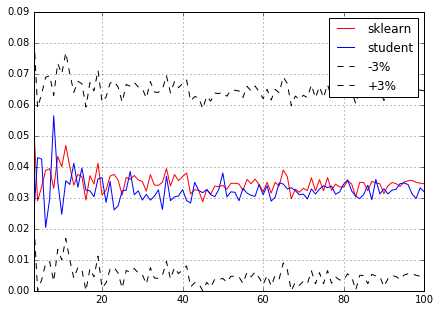

In [8]:
plot_compare_graphs(trees_range, loss['sklearn']['train'], loss['student']['train'], 0.03)

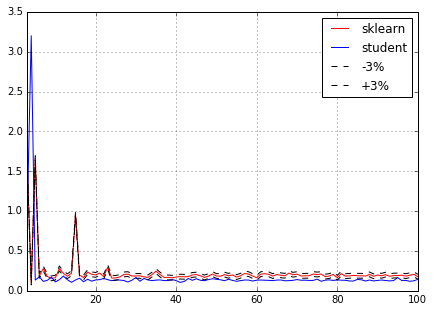

In [9]:
plot_compare_graphs(trees_range, loss['sklearn']['test'], loss['student']['test'], 0.03)

In [10]:
def plot_graphs(trees_range, **kwargs):
    plt.figure(figsize=(7, 5))
    
    for name, data in kwargs.iteritems():
        plt.plot(trees_range, data, label=name)
    
    plt.xlim(min(trees_range), max(trees_range))
    plt.grid()
    plt.legend()
    plt.show()

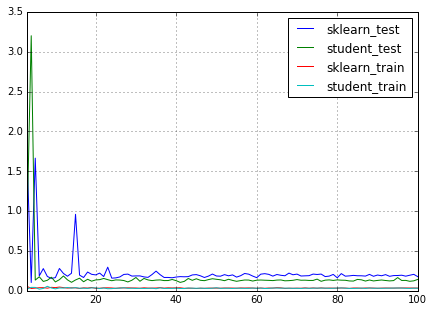

In [11]:
kwargs = dict()
for cat_cl in ['sklearn', 'student']:
    for cat_set in ['train', 'test']:
        kwargs['{}_{}'.format(cat_cl, cat_set)] = loss[cat_cl][cat_set]
        
plot_graphs(trees_range, **kwargs)